# Sprawozdanie 1
### Autorzy:
* inż. Marcin Bober 249426
* inż. Piotr Gorzelnik 248947
* inż. Wiktor Springer 248970

## Aliasing 2D

Zniekształcenia powstają ze względu na rejestrowanie fragmentów obrazu w różnych chwilach czasu. Zanim cały obraz zostanie zarejestrowany, obiekt zdąży się przemieścić co zostanie uwiecznione jako zniekształcenie. Problem staje się tym dotkliwszy im wolniej skanujemy obraz. Rozwiązaniem jest rejestrowanie całego obrazu na raz. 

In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Sprawdzenie czy punkt jest w danym obszarze
def is_in_carbox(x, y, line_idx):
  carbox_y_start = camera_lines * line_idx - multiplier
  carbox_y_stop = camera_lines * (line_idx + 1) - multiplier
  return (x >= -multiplier and x < multiplier) and (y >= carbox_y_start and y < carbox_y_stop)

# Przejście z kartezjańskich do biegunowych
def cartesian(x, deg):
  return x * np.cos(deg), x * np.sin(deg)

# Generowanie linii
def gen_line(rotation, carbox_idx):
  x_passed, y_passed = [], []
  x, y = cartesian(fx(linspace, rotation) * multiplier, linspace)
  for i in range(x.size):
    if is_in_carbox(x[i], y[i], carbox_idx):
      x_passed.append(x[i])
      y_passed.append(y[i])
  return x_passed, y_passed

# Generowanie ramki
def gen_frame(rotation):
  x_frame, y_frame = [], []
  for carbox_idx in range(int(car_box_size)):
    x_passed, y_passed = gen_line(rotation+carbox_idx, carbox_idx)
    x_frame += x_passed
    y_frame += y_passed
    # print("carbox_idx: ", carbox_idx, "rotation: ", rotation)
    # ax.scatter(x_passed, y_passed, color='blue', s=1)
    # plt.pause(0.1)
  return x_frame, y_frame

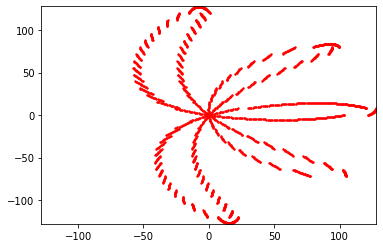

In [4]:
wings = 5
frame_size = 256
camera_lines = 8
frames = 64
multiplier = frame_size/2
car_box_size = frame_size / camera_lines
rotation = np.arange(-frames / 2, frames / 2, 1)
resolution = 2000

linspace = np.linspace(0, 2 * np.pi * multiplier, resolution)
fx = lambda x, m: np.sin(wings * x + (m * np.pi /10))

fig = plt.figure()
ax = fig.add_subplot()

for i in range(frames):
  ax.clear()
  ax.set_xlim(-multiplier, multiplier)
  ax.set_ylim(-multiplier, multiplier)
  x_frame, y_frame = gen_frame(rotation[i])
  ax.scatter(x_frame, y_frame, color='red', s=2)
  plt.pause(0.01)

plt.show()

W Jupiter nie działają animacje więc, aby zobaczyć ruszający się obraz wystarczy uruchomić powyższy kod w osobnym pliku Pythona.

### Interpolacja liniowa

W interpolacji liniowej krzywa łącząca dwa sąsiednie węzły jest linią prostą. Metoda ta opiera się na założeniu, że wartości funkcji w punktach między węzłami rosną lub maleją liniowo. W wyniku interpolacji liniowej otrzymujemy funkcję ciągłą, która przyjmuje wartości w punktach między węzłami, a jej wartości w węzłach interpolacji są zgodne z wartościami funkcji pierwotnej.

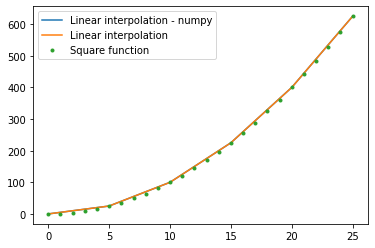

In [5]:
def square(x):
    return x**2

x_values = np.arange(26)
y_values = [square(x) for x in x_values]

interp_x = np.arange(0, 26, 5) # zakres X na którym będzie odbywać się interpolacja
interp_y_linear = []

# LINEAR
for x in interp_x:
    i = 0
    while i < len(x_values) - 1 and x > x_values[i+1]: # znajdź dwa najbliższe x
        i += 1
        
    slope = (y_values[i+1] - y_values[i]) / (x_values[i+1] - x_values[i])
    y = y_values[i] + slope * (x - x_values[i])
    
    interp_y_linear.append(y)

interp_y_np_linear = np.interp(interp_x, x_values, y_values)

# LINEAR INTERPOLATION
plt.plot(interp_x, interp_y_np_linear, label='Linear interpolation - numpy')
plt.plot(interp_x, interp_y_linear, label='Linear interpolation')
plt.plot(x_values, y_values, '.', label='Square function')
plt.legend()
plt.show()

### Interpolacja metodą najbliższego sąsiada

 W interpolacji najbliższego sąsiada, wartość funkcji w danym punkcie interpolacji jest przybliżana przez wartość funkcji w najbliższym węźle interpolacji. Metoda ta polega na tym, że dla danego punktu interpolacji znajdujemy węzeł interpolacji, który jest najbliższy temu punktowi, a następnie przyjmujemy wartość funkcji w tym węźle jako przybliżenie wartości funkcji w punkcie interpolacji. W wyniku interpolacji najbliższego sąsiada, otrzymujemy funkcję skokową, która przyjmuje wartości w punktach między węzłami, a jej wartości w węzłach interpolacji są zgodne z wartościami funkcji pierwotnej. 

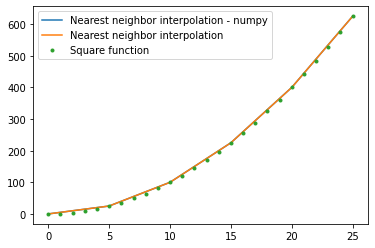

In [23]:
def square(x):
    return x**2

x_values = np.arange(26)
y_values = square(x_values)

interp_x = np.arange(0, 26, 5) # zakres X na którym będzie odbywać się interpolacja
interp_y_np_nn = y_values[np.searchsorted(x_values, interp_x, side='left')]

# NEAREST NEIGHBOUR
interp_y_nn = []
for x in interp_x:
    # znajdź indeks najbliższej wartości x w x_values
    index = min(range(len(x_values)), key=lambda i: abs(x_values[i]-x))
    
    # dodaj wartość y do listy interp_y
    interp_y_nn.append(y_values[index])


# NN INTERPOLATION
plt.plot(interp_x, interp_y_np_nn, label='Nearest neighbor interpolation - numpy')
plt.plot(interp_x, interp_y_nn, label='Nearest neighbor interpolation')
plt.plot(x_values, y_values, '.', label='Square function')
plt.legend()
plt.show()

### Interpolacja funkcją kwadratową 

Dla dowolnie wybranego ciągu została wykonana interpolcja funkcją kwadratową. Dodatkowo przeprowadzanie badań jakościowych zaimplementowanego algorytmu z funkcją dostępną w bibliotece SciPy

MAE: 5.1292039922310045e-12 | MAE Scipy: 1.2081644815500094e-14
MSE: 9.596502821981099e-23 | MSE Scipy: 5.392485466332827e-28
time: 0.00067138671875s | Scipy time: 0.0005393028259277344s


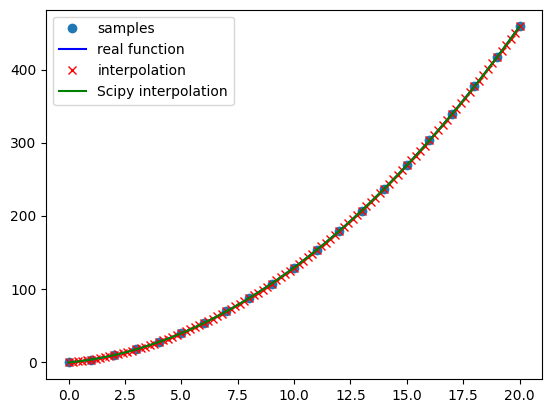

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import time



def mse(realY, Y):
    
    sum = np.square(np.subtract(realY,Y))
    return np.mean(sum)


def mae(realY, Y):

    sum = np.abs(np.subtract(realY,Y))
    return np.mean(sum)




def quadraticInterpolation(x, y, x_samples, y_samples):

    start = time.time()

    y_inter = [y_samples[0]]

    for i in range(1, len(x_samples) - 1, 2):
        x_1, x_2, x_3 = x_samples[i -1], x_samples[i], x_samples[i+1]
        y_1, y_2, y_3 = y_samples[i -1], y_samples[i], y_samples[i+1]
        [ a, b, c ]= np.matmul(np.linalg.inv([[x_1**2, x_1, 1], [x_2**2, x_2, 1], [x_3**2, x_3, 1]]),
                                                                                  [y_1, y_2, y_3])

        for j in x:
            if(j < x_3) and (j > x_1):
                y_temp = a*(j**2)+b*j+c
                y_inter.append(y_temp)
            elif (j == x_3):
                y_inter.append(y_3)


    end = time.time()

    startSci = time.time()
    SciPolynomial = interp1d(x_samples, y_samples, kind = 'quadratic')
    ySci = SciPolynomial(x)
    endSci = time.time()

    mse_our = mse(y, y_inter)
    mse_sci = mse(y, ySci)

    mae_our = mae(y, y_inter)
    mae_sci = mae(y, ySci)

    print(f"MAE: {mae_our} | MAE Scipy: {mae_sci}")
    print(f"MSE: {mse_our} | MSE Scipy: {mse_sci}")
    print(f"time: {end-start}s | Scipy time: {endSci-startSci}s")

    plt.clf()
    plt.plot(x_samples, y_samples, 'o', label='samples')
    plt.plot(x, y, 'b',label='real function')
    plt.plot(x, y_inter, 'xr', label='interpolation')
    plt.plot(x, ySci, 'g', label='Scipy interpolation')
    plt.legend()
    plt.show()

def main():

    f = lambda x: x**2+3*x -1
    x = np.linspace(0, 20, 101)
    y = f(x)

    x_samples = x[::5]
    y_samples = y[::5]

    quadraticInterpolation(x, y, x_samples, y_samples)

if __name__ == '__main__':
    main()

### Interpolacja funkcją szcześcienną  

Dla dowolnie wybranego ciągu została wykonana interpolcja funkcją sześcieną. Dodatkowo przeprowadzanie badań jakościowych zaimplementowanego algorytmu z funkcją dostępną w bibliotece SciPy

MAE: 0.007920761857213235 | MAE Scipy: 1.6680276521954888e-14
MSE: 0.0004975501724586779 | MSE Scipy: 8.99613028348342e-28
time: 0.0017938613891601562s | Scipy time: 0.007819890975952148s


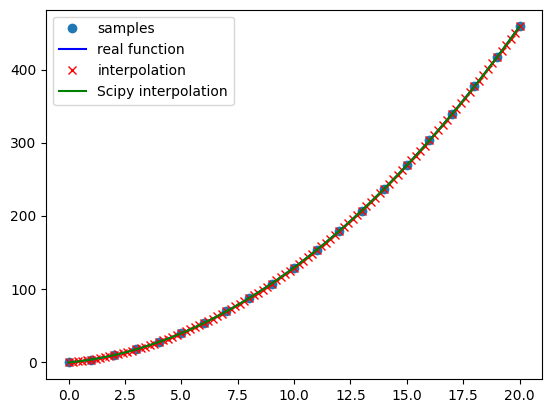

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time

def mse(realY, Y):
    
    sum = np.square(np.subtract(realY,Y))
    return np.mean(sum)


def mae(realY, Y):

    sum = np.abs(np.subtract(realY,Y))
    return np.mean(sum)

def cubic_interpolation(x, y, x_new):
    n = len(x)
    a = y.copy()
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    h = np.diff(x)
    alpha = np.zeros(n-1)
    for i in range(1, n-1):
        alpha[i] = (3/h[i])*(a[i+1]-a[i]) - (3/h[i-1])*(a[i]-a[i-1])
    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    for i in range(1, n-1):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]
    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0
    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d[j] = (c[j+1]-c[j])/(3*h[j])
    y_new = np.zeros(len(x_new))
    for i in range(len(x_new)):
        idx = np.searchsorted(x, x_new[i])
        if idx == 0:
            idx = 1
        elif idx == n:
            idx = n-1
        t = (x_new[i]-x[idx-1])/h[idx-1]
        y_new[i] = a[idx-1] + b[idx-1]*t + c[idx-1]*t**2 + d[idx-1]*t**3
    return y_new






def main():

    f = lambda x: x**2+3*x -1
    x = np.linspace(0, 20, 101)
    y = f(x)

    x_samples = x[::5]
    y_samples = y[::5]

    start = time.time()
    # Interpolacja kubiczna
    y_new = cubic_interpolation(x_samples, y_samples, x)
    end = time.time()
    
    startSci = time.time()
    SciPolynomial = interp1d(x_samples, y_samples, kind = 'cubic')
    ySci = SciPolynomial(x)
    endSci = time.time()



    mse_our = mse(y, y_new)
    mse_sci = mse(y, ySci)

    mae_our = mae(y, y_new)
    mae_sci = mae(y, ySci)

    print(f"MAE: {mae_our} | MAE Scipy: {mae_sci}")
    print(f"MSE: {mse_our} | MSE Scipy: {mse_sci}")
    print(f"time: {end-start}s | Scipy time: {endSci-startSci}s")

    plt.clf()
    plt.plot(x_samples, y_samples, 'o', label='samples')
    plt.plot(x, y, 'b',label='real function')
    plt.plot(x, y_new, 'xr', label='interpolation')
    plt.plot(x, ySci, 'g', label='Scipy interpolation')
    plt.legend()
    plt.show()
 

if __name__ == '__main__':
    main()




In [7]:
from PIL import Image
import numpy as np

bayer_array = np.array([    ['G', 'B'],
                            ['R', 'G']      ])

fuji_array = np.array([     ['G', 'B', 'R', 'G', 'R', 'B'],
                            ['R', 'G', 'G', 'B', 'G', 'G'],
                            ['B', 'G', 'G', 'R', 'G', 'G'],
                            ['G', 'R', 'B', 'G', 'B', 'R'],
                            ['B', 'G', 'G', 'R', 'G', 'G'],
                            ['R', 'G', 'G', 'B', 'G', 'G'],     ])

def to_mosaic(image, window):
    mosaic = image.copy()
    for i in range(0, image.shape[0]-window.shape[0]+1, window.shape[0]):       # dla każdego piksela w obrazie (wiersz)
        for j in range(0, image.shape[1]-window.shape[1]+1, window.shape[1]):   # dla każdego piksela w obrazie (kolumna)
            for k in range(window.shape[0]):                                    # dla każdego piksela w oknie (wiersz)
                for l in range(window.shape[1]):                                # dla każdego piksela w oknie (kolumna)
                    if window[k, l] == 'R':
                        mosaic[i+k, j+l, 1] = 0 # zerujemy G
                        mosaic[i+k, j+l, 2] = 0 # zerujemy B
                    elif window[k, l] == 'G':
                        mosaic[i+k, j+l, 0] = 0 # zerujemy R
                        mosaic[i+k, j+l, 2] = 0 # zerujemy B
                    elif window[k, l] == 'B':
                        mosaic[i+k, j+l, 0] = 0 # zerujemy R
                        mosaic[i+k, j+l, 1] = 0 # zerujemy G
    return mosaic


def to_demosaic(mosaic, window):
    demosaic = mosaic.copy()
    for i in range(0, mosaic.shape[0]-window.shape[0]+1, window.shape[0]):      # dla każdego piksela w obrazie (wiersz)
        for j in range(0, mosaic.shape[1]-window.shape[1]+1, window.shape[1]):  # dla każdego piksela w obrazie (kolumna)
            r, g, b = 0, 0, 0                                                   # sumy wartości pikseli w oknie
            r_count, g_count, b_count = 0, 0, 0                                 # liczniki pikseli w oknie
            for k in range(window.shape[0]):                                    # dla każdego piksela w oknie (wiersz)
                for l in range(window.shape[1]):                                # dla każdego piksela w oknie (kolumna)
                    # zliczanie liczby pikseli R, G, B do demozaiki
                    r_count += 1 if window[k, l] == 'R' else 0
                    g_count += 1 if window[k, l] == 'G' else 0
                    b_count += 1 if window[k, l] == 'B' else 0
                    # sumowanie wartości pikseli R, G, B do demozaiki
                    r += mosaic[i+k, j+l, 0]
                    g += mosaic[i+k, j+l, 1]
                    b += mosaic[i+k, j+l, 2]
            
            for k in range(window.shape[0]):                                   # dla każdego piksela w oknie (wiersz)
                for l in range(window.shape[1]):                               # dla każdego piksela w oknie (kolumna)
                  demosaic[i + k, j + l] = [r / r_count, g / g_count, b / b_count]  # demozaika (suma wartości / liczbe wystąpień, żeby nie wyszło poza zakres)
    return demosaic


def img_to_array(file):
    return np.asarray(Image.open(file))

def save_img(array, file):
    (Image.fromarray(array)).save(file)

def main():
    image = img_to_array('albert-einstein.jpg')
    mosaic = to_mosaic(image, bayer_array)
    demosaic = to_demosaic(mosaic, bayer_array)

    save_img(mosaic, 'albert-einstein_mosaic.png')
    save_img(demosaic, 'albert-einstein_demosaic.png')

main()

### Obraz wejściowy

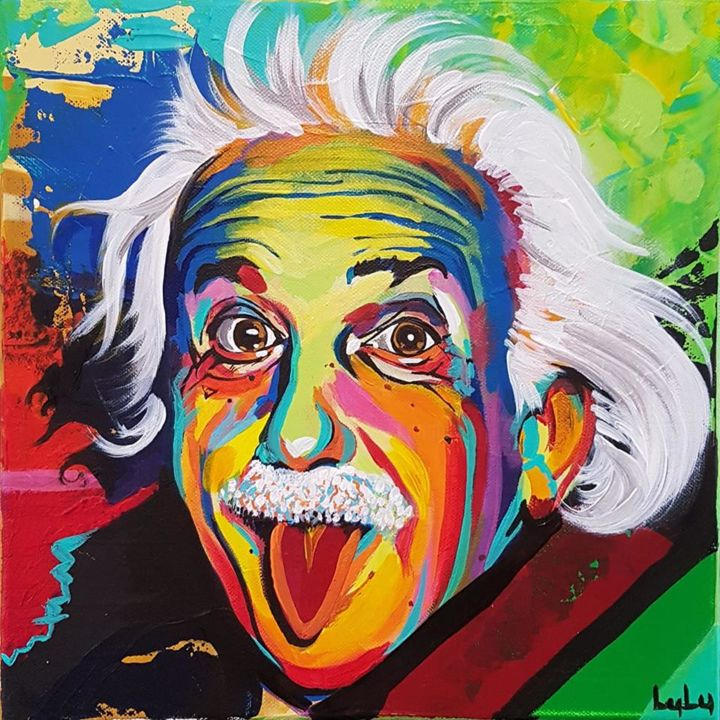

In [8]:
from IPython import display
display.Image("albert-einstein.jpg")

### Obraz po mozajkowaniu

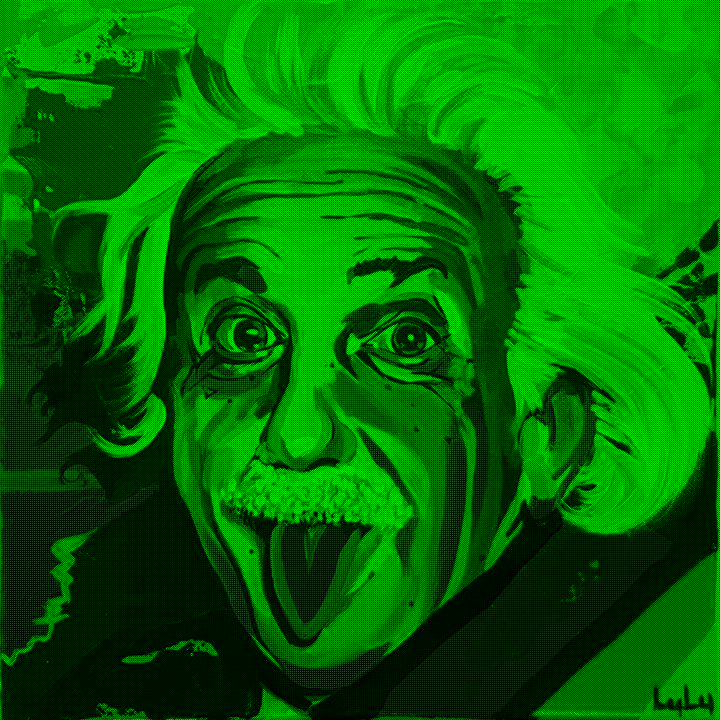

In [9]:
display.Image("albert-einstein_mosaic.png")

### Obraz po demozajkowaniu

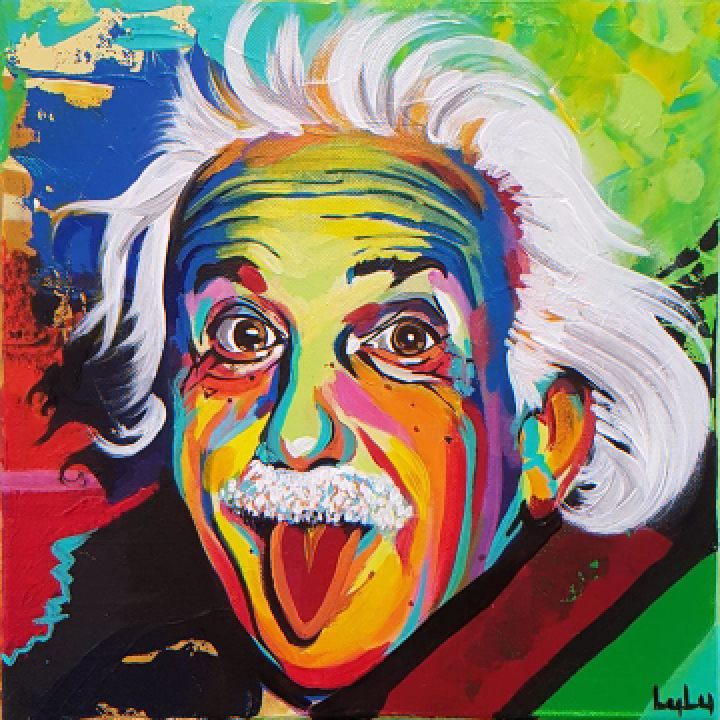

In [10]:
display.Image("albert-einstein_demosaic.png")